In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.core.dtypes.common import is_numeric_dtype
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('global_laptop_selling_data.csv', encoding='ISO-8859-1')

In [4]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [5]:
df.nunique()

laptop_ID           1303
Company               19
Product              618
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  110
OpSys                  9
Weight               179
Price_euros          791
dtype: int64

In [6]:
df = df.drop('laptop_ID', axis=1)

In [6]:
df.head() # y = df[['Price_euros']]

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [7]:
df.describe()

,Inches,Price_euros
count,1303.000000,1303.000000
mean,15.017191,1123.686992
std,1.426304,699.009043
min,10.100000,174.000000
25%,14.000000,599.000000
50%,15.600000,977.000000
75%,15.600000,1487.880000
max,18.400000,6099.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price_euros       1303 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


# Preprocessing

In [9]:
df["Weight"] = df["Weight"].str.replace("kg","")
df["Weight"] = pd.to_numeric(df["Weight"])
df["Ram"] = df["Ram"].apply(lambda x : str(x).replace("GB","")).astype(int)

In [10]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [11]:
df_product_price = df.groupby("Company")["Price_euros"].mean()

In [12]:
df_product_price

Company
Acer          626.775825
Apple        1564.198571
Asus         1104.169367
Chuwi         314.296667
Dell         1186.068990
Fujitsu       729.000000
Google       1677.666667
HP           1067.774854
Huawei       1424.000000
LG           2099.000000
Lenovo       1086.384444
MSI          1728.908148
Mediacom      295.000000
Microsoft    1612.308333
Razer        3346.142857
Samsung      1413.444444
Toshiba      1267.812500
Vero          217.425000
Xiaomi       1133.462500
Name: Price_euros, dtype: float64

In [13]:
df_product_price = pd.DataFrame(data = df_product_price)
df_product_price.columns = ["Product Avg Price"]
df_product_price.sort_values(by="Product Avg Price",ascending=False,inplace=True)

In [14]:
df_product_price

,Product Avg Price
Company,
Razer,3346.142857
LG,2099.000000
MSI,1728.908148
Google,1677.666667
Microsoft,1612.308333
Apple,1564.198571
Huawei,1424.000000
Samsung,1413.444444
Toshiba,1267.812500


Text(0.5, 1.0, 'Average Price Per Company')

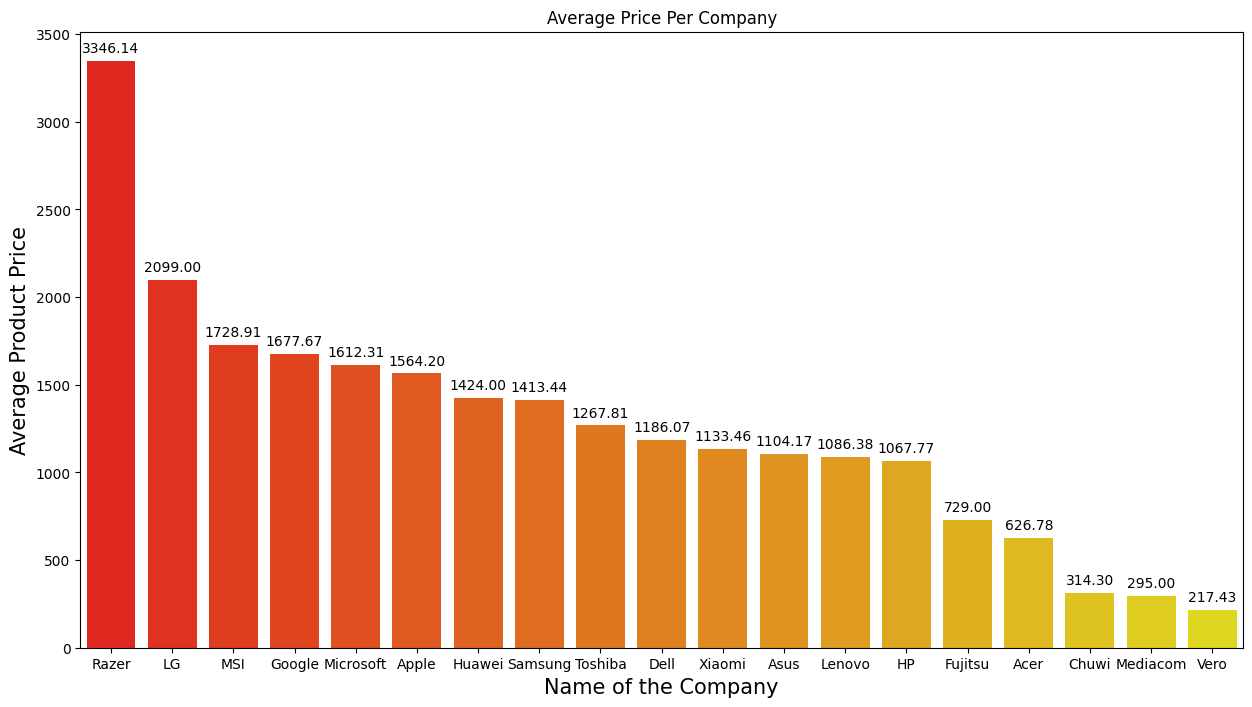

In [15]:
plt.figure(figsize = (15,8))
splot = sns.barplot(data = df_product_price,x= df_product_price.index, y = 'Product Avg Price', palette = 'autumn')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
plt.xlabel("Name of the Company", size=15)
plt.ylabel("Average Product Price", size=15)
plt.title('Average Price Per Company')

In [16]:
df_productType_wise_price = df.groupby("TypeName")["Price_euros"].mean()
df_productType_wise_price = pd.DataFrame(data = df_productType_wise_price)

df_productType_wise_price.columns = ["Product Price"]
df_productType_wise_price.sort_values(by="Product Price",ascending=False,inplace=True)

Text(0.5, 1.0, 'Product Type Wise Average Price')

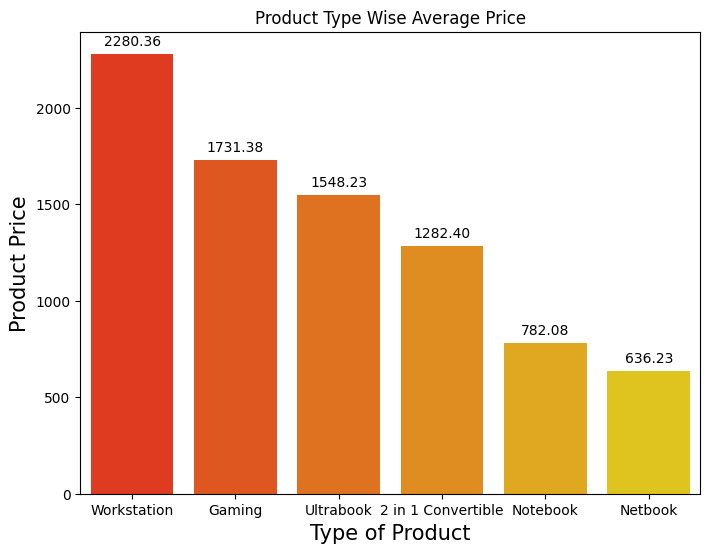

In [17]:
plt.figure(figsize = (8,6))
splot = sns.barplot(data = df_productType_wise_price,x= df_productType_wise_price.index, y = 'Product Price', palette = 'autumn')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
plt.xlabel("Type of Product", size=15)
plt.ylabel("Product Price", size=15)
plt.title('Product Type Wise Average Price')

In [17]:
df.shape

(1303, 12)

In [18]:
df.isnull().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

<AxesSubplot:>

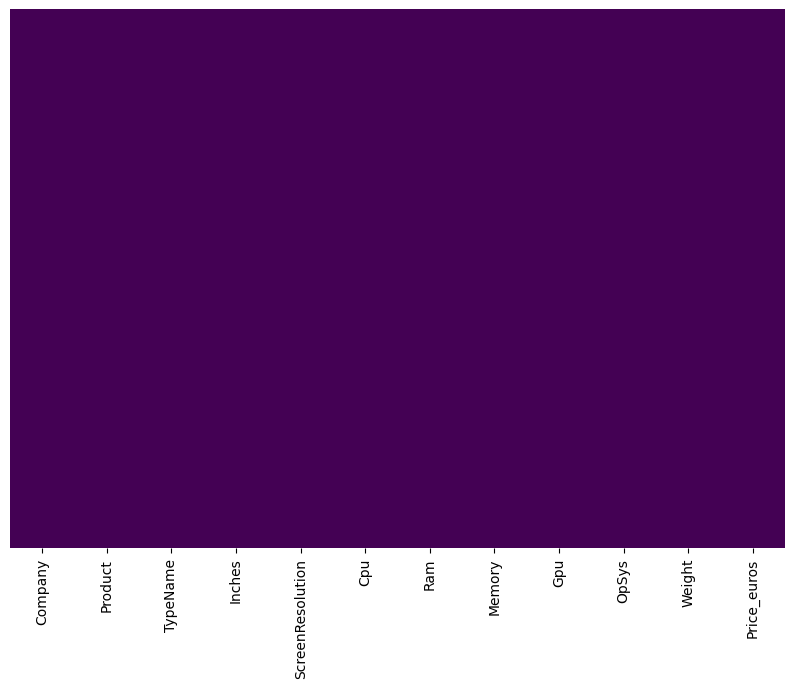

In [19]:
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Encoding

In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [21]:
for col in df.columns:
    if is_numeric_dtype(df[col]):
        continue
    else:
        df[col]=le.fit_transform(df[col])
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,300,4,13.3,23,65,8,4,58,8,1.37,1339.69
1,1,301,4,13.3,1,63,8,2,51,8,1.34,898.94
2,7,50,3,15.6,8,74,8,16,53,4,1.86,575.00
3,1,300,4,15.4,25,85,16,29,9,8,1.83,2537.45
4,1,300,4,13.3,23,67,8,16,59,8,1.37,1803.60


In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Company,1303.0,6.442824,4.084128,0.00,4.0,7.00,10.00,18.0
Product,1303.0,308.207214,171.887833,0.00,182.5,291.00,455.50,617.0
TypeName,1303.0,2.582502,1.245231,0.00,1.5,3.00,3.00,5.0
Inches,1303.0,15.017191,1.426304,10.10,14.0,15.60,15.60,18.4
ScreenResolution,1303.0,9.224098,7.885050,0.00,6.0,8.00,15.00,39.0
Cpu,1303.0,76.983883,25.190467,0.00,65.0,78.00,97.00,117.0
Ram,1303.0,8.382195,5.084665,2.00,4.0,8.00,8.00,64.0
Memory,1303.0,16.345357,8.008281,0.00,10.0,16.00,23.00,38.0
Gpu,1303.0,54.682272,21.623195,0.00,46.0,53.00,72.00,109.0
OpSys,1303.0,4.808903,1.035253,0.00,5.0,5.00,5.00,8.0


<AxesSubplot:>

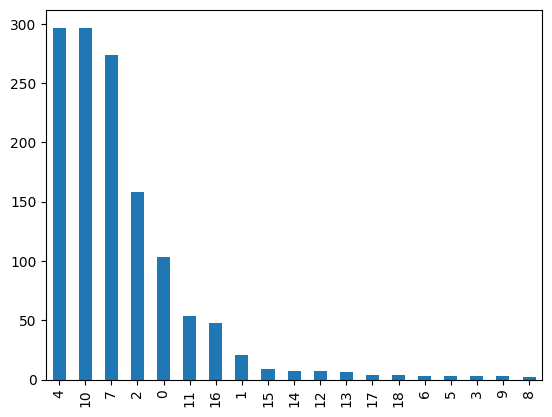

In [28]:
df['Company'].value_counts().plot(kind='bar')

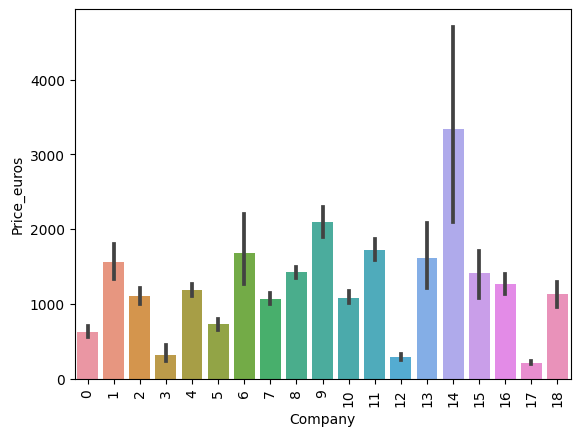

In [29]:
sns.barplot(x=df['Company'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

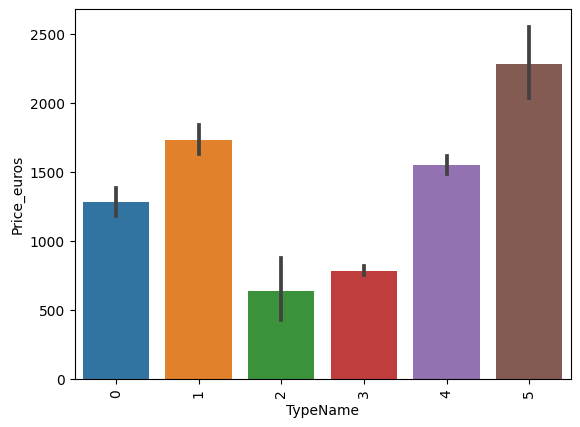

In [30]:
sns.barplot(x=df['TypeName'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

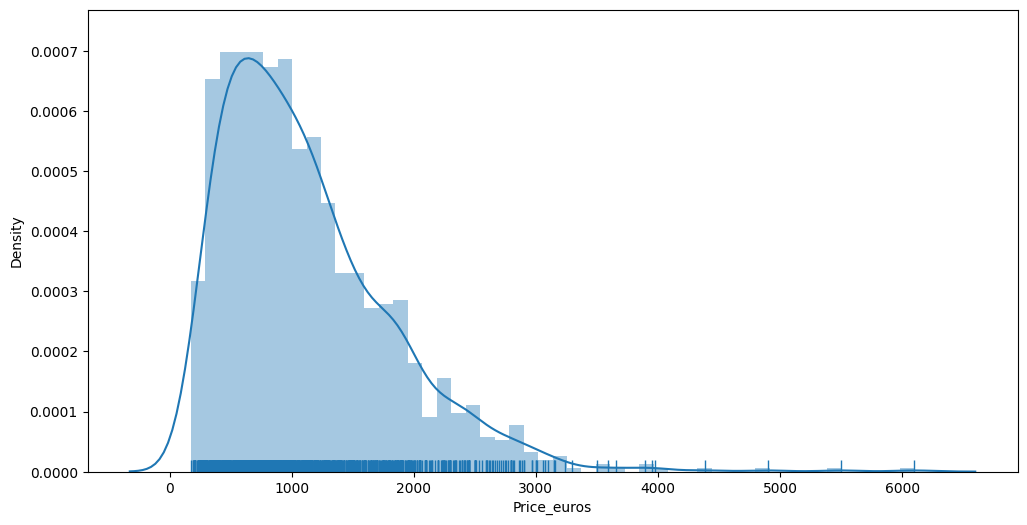

In [23]:
plt.figure(figsize=(12,6))
sns.distplot(df['Price_euros'], kde=True, bins=50, rug=True)
plt.show()

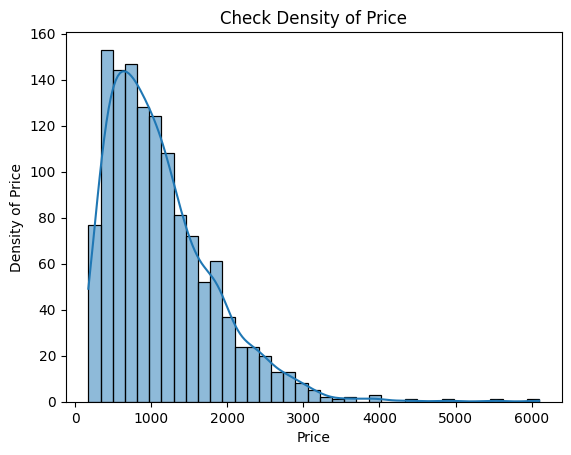

In [24]:
ax=sns.histplot(df['Price_euros'],kde=True)
ax.set_xlabel("Price")
ax.set_ylabel("Density of Price")
ax.set_title("Check Density of Price")
plt.show()

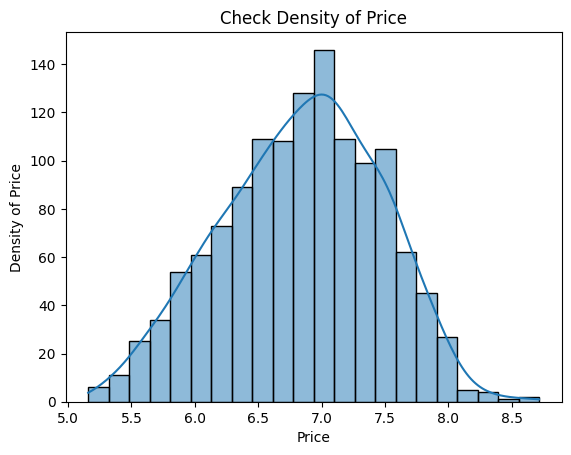

In [25]:
ax=sns.histplot(np.log(df['Price_euros']),kde=True)
ax.set_xlabel("Price")
ax.set_ylabel("Density of Price")
ax.set_title("Check Density of Price")
plt.show()

<AxesSubplot:>

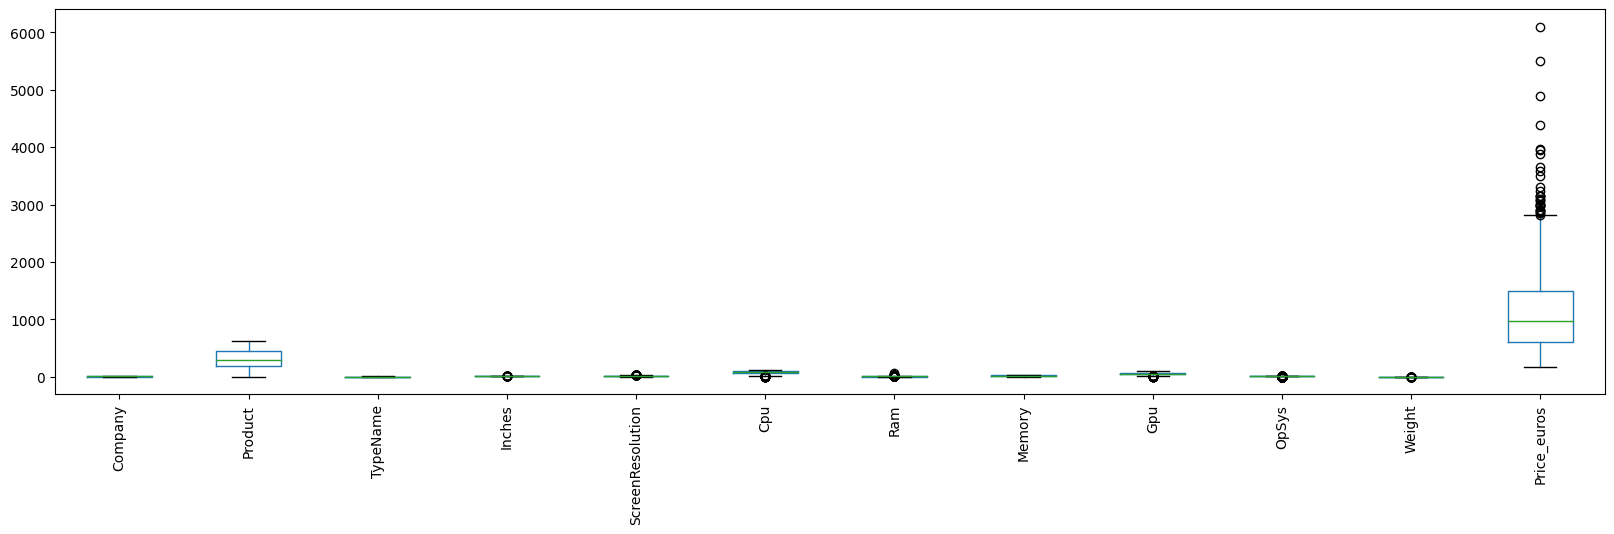

In [25]:
df.plot.box(figsize=(20,5), rot=90)

In [31]:
df.corr()['Price_euros']

Company             0.140371
Product             0.139289
TypeName           -0.127313
Inches              0.068197
ScreenResolution    0.331327
Cpu                 0.529334
Ram                 0.743007
Memory              0.185680
Gpu                 0.443299
OpSys               0.288911
Weight              0.210370
Price_euros         1.000000
Name: Price_euros, dtype: float64

# Scalling

In [26]:
#from sklearn.preprocessing import MinMaxScaler
#mmxscaler = MinMaxScaler()

In [27]:
#column=[df.columns]
#print(column)

In [28]:
#for col in column:
#    df[col]=mmxscaler.fit_transform(df[col])
#df.head()

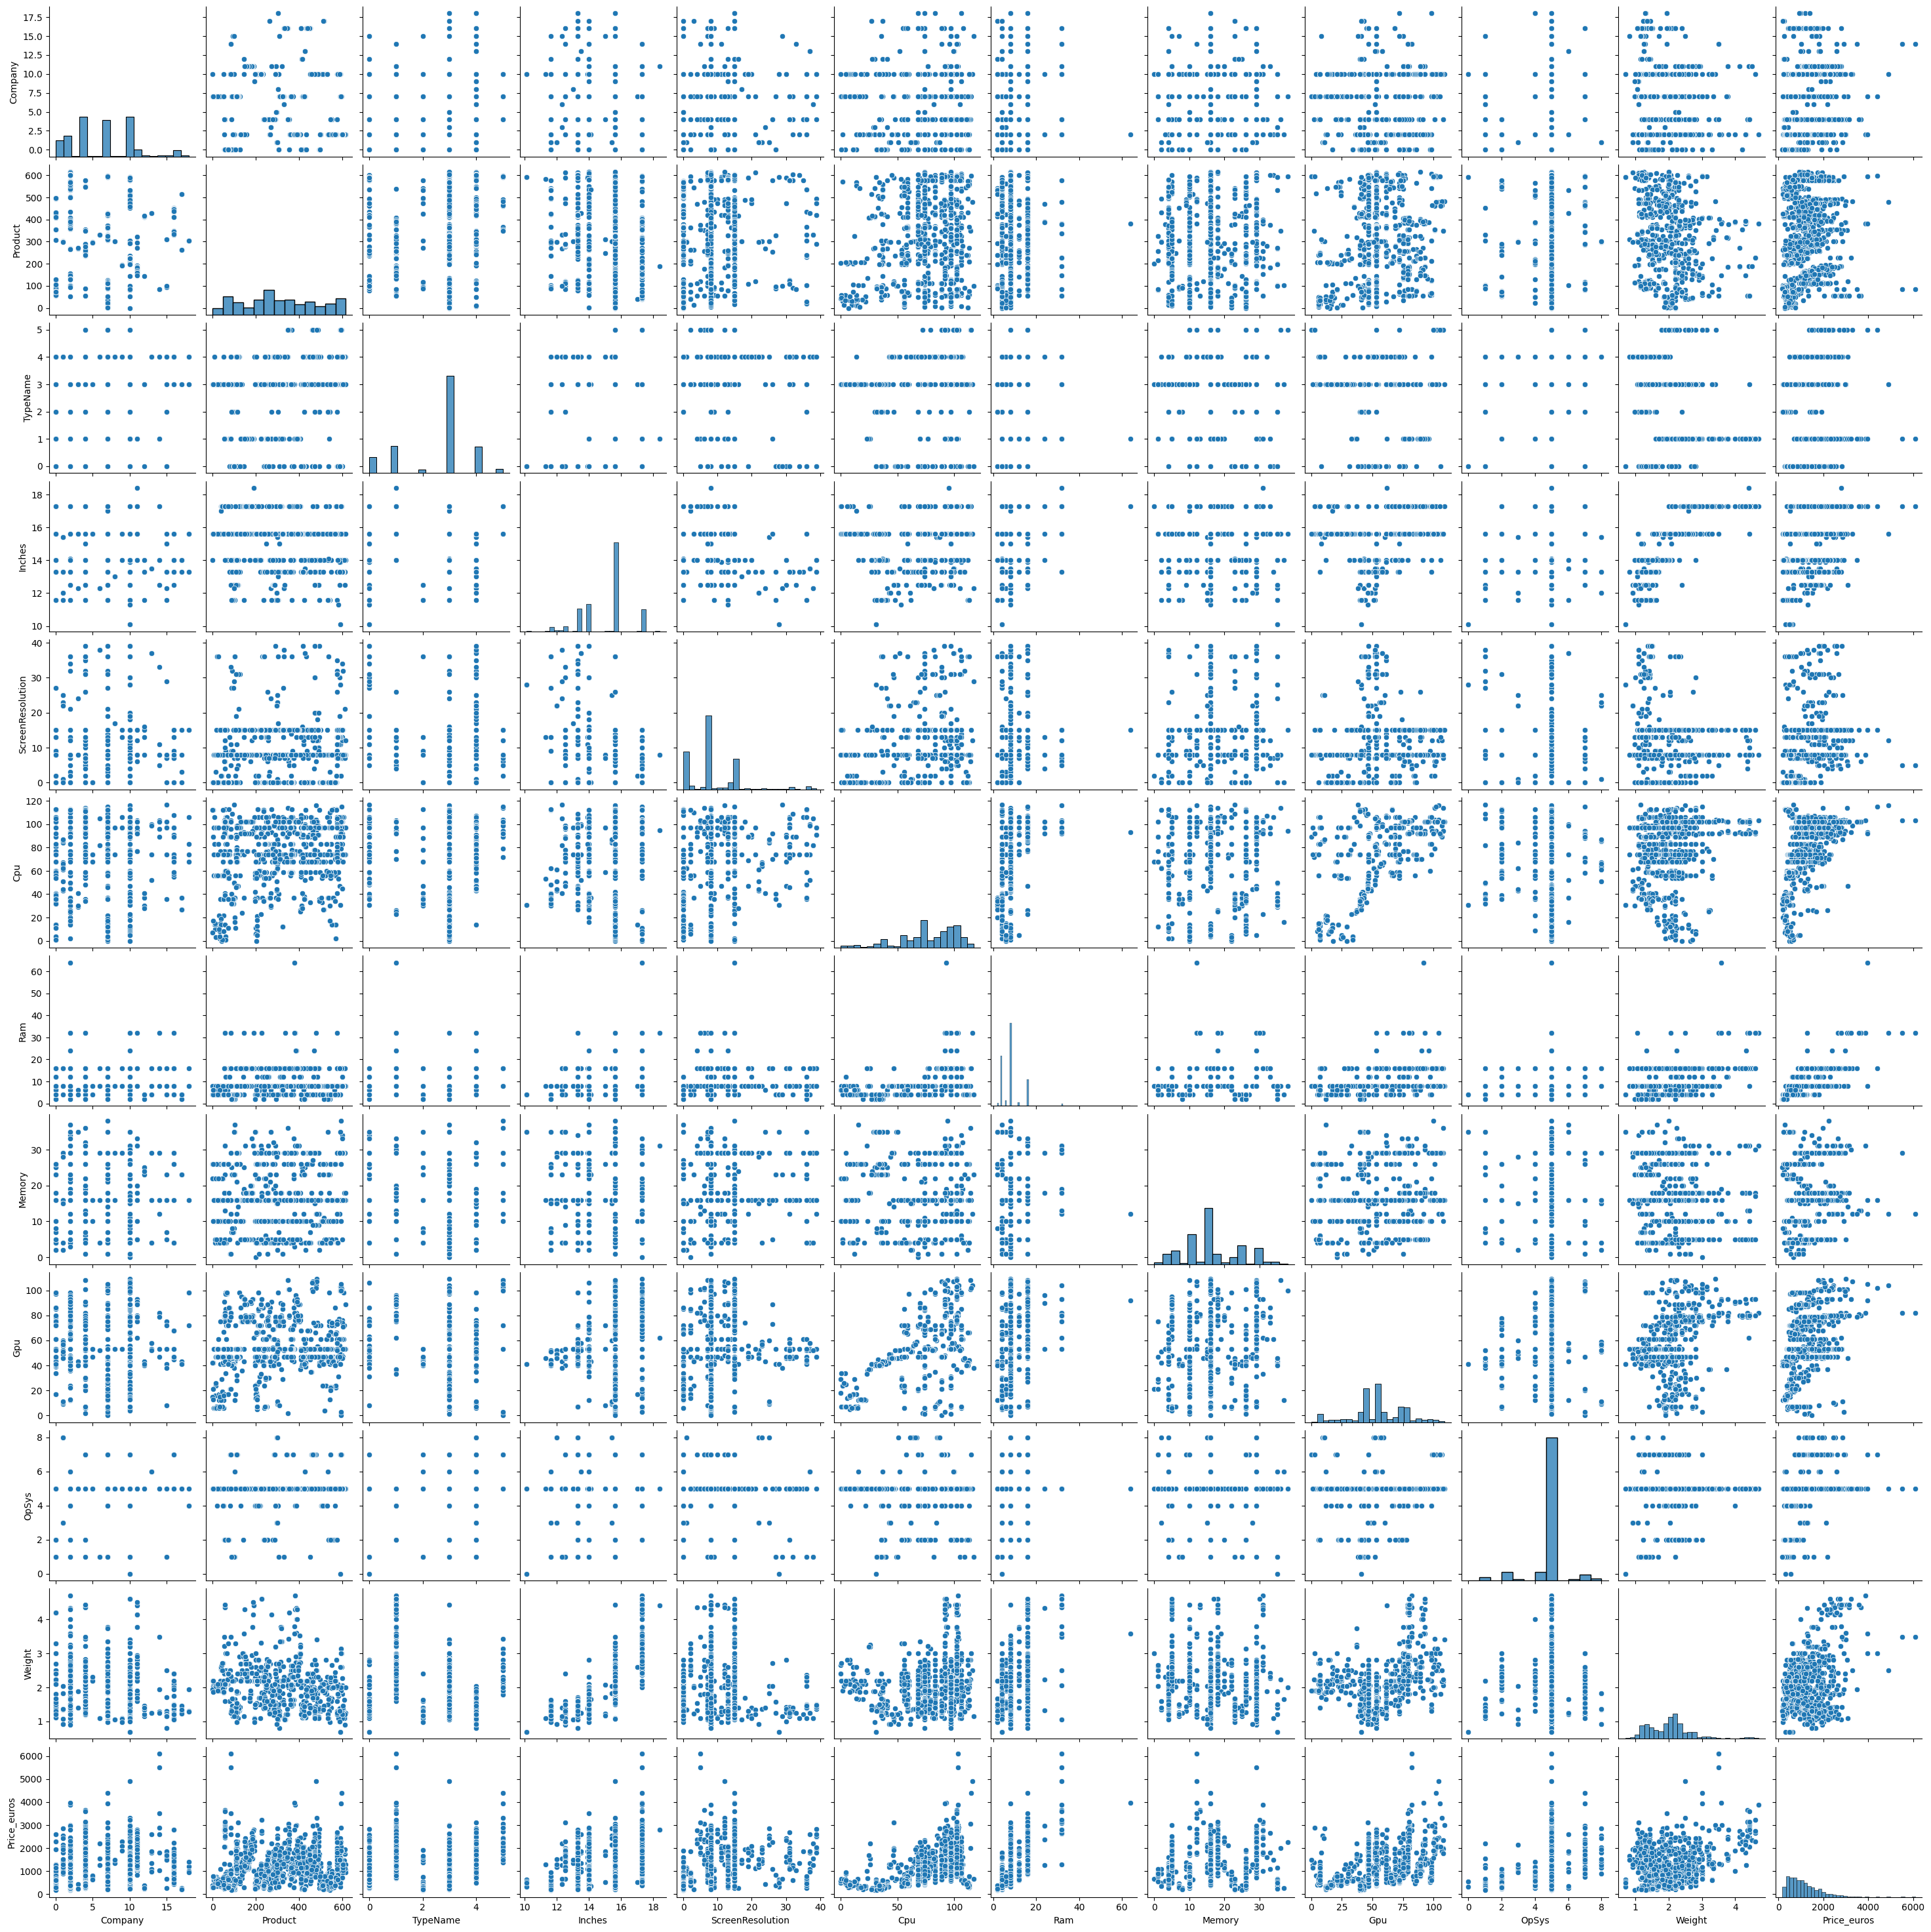

In [29]:
sns.pairplot(df)

<AxesSubplot:>

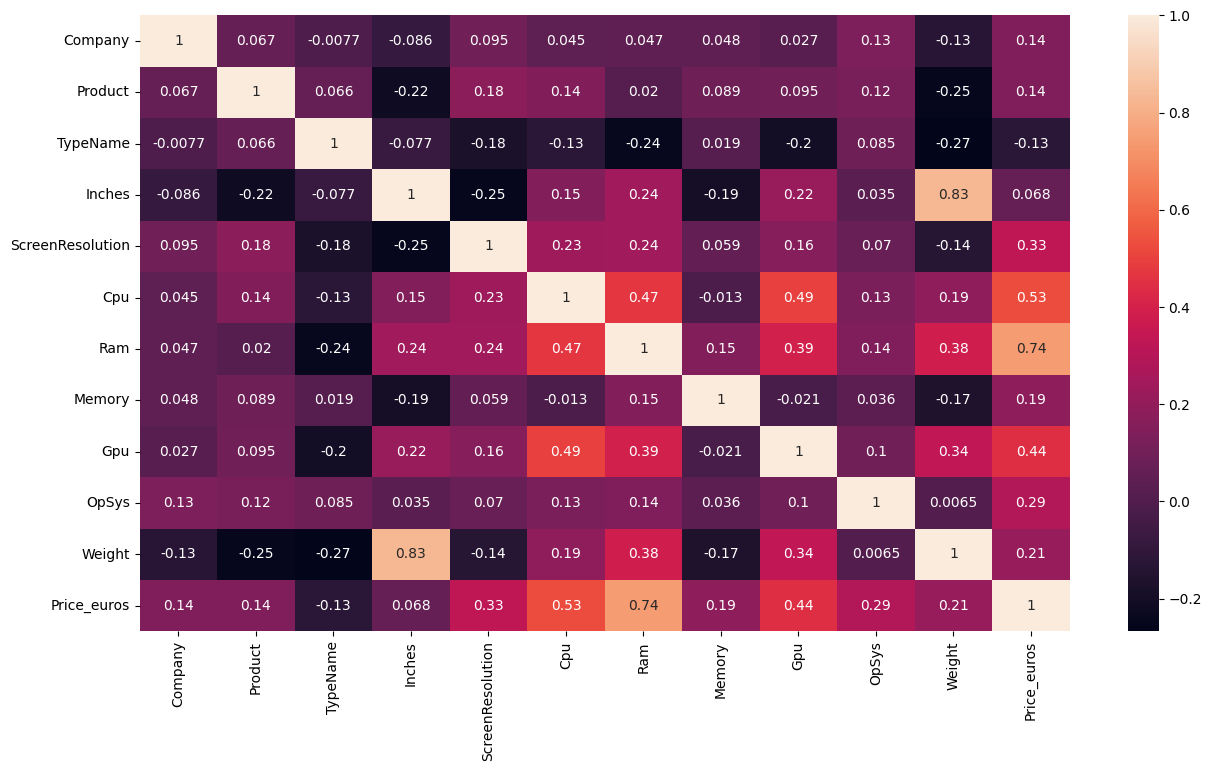

In [30]:
plt.figure(figsize=(15,8))
sns.heatmap(data=df.corr(),annot=True)

In [31]:
#X=df.drop(df[['Price_euros']],axis=1)
#X

In [42]:
Y=np.log(df[['Price_euros']])
Y

,Price_euros
0,7.200194
1,6.801216
2,6.354370
3,7.838915
4,7.497540
...,...
1298,6.458338
1299,7.312553
1300,5.433722
1301,6.638568


# Train = 80%, Test = 20%

In [33]:
#from sklearn.model_selection import train_test_split as tts
#X_train,X_test,Y_train,Y_test=tts(X,Y,test_size=.20, random_state=1)

In [34]:
#X_train.shape

In [35]:
#X_test.shape

In [45]:
x=df.drop('Price_euros',axis=1)
x.shape

(1303, 11)

In [48]:
y=np.log(df[['Price_euros']])
len(y)

1303

In [43]:
from sklearn.model_selection import train_test_split 

In [49]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.75,random_state=42)

# Linear Regression

In [50]:
from sklearn.linear_model import LinearRegression
lereg=LinearRegression()

# KNN Regressor

In [54]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=3)

# Random Forest Regression

In [53]:
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor()

# DecisionTreeRegressor

In [55]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor(max_depth=1)

# Support Vector Regression (SVR)

In [56]:
from sklearn.svm import SVR
svr_lr=SVR(C=1.0, epsilon=0.2, kernel='linear')
svr_rbf=SVR(kernel='rbf',C=1.0,epsilon=0.2)

# Lasso Regression

In [57]:
from sklearn import linear_model
lassoReg = linear_model.Lasso(alpha=0.1)

# Gradient Boosting

In [58]:
from sklearn.ensemble import GradientBoostingRegressor

In [60]:
GDboosing=GradientBoostingRegressor(n_estimators=500)

# Ada Boost

In [61]:
from sklearn.ensemble import AdaBoostRegressor

In [62]:
AdaBoost=AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

# Extra Trees

In [63]:
from sklearn.ensemble import ExtraTreesRegressor

In [70]:
ExtraTree=ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15,
                            bootstrap=True)

# xgboost

In [65]:
from xgboost import XGBRegressor

In [79]:
XGB=XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

# GaussianProcessRegressor

In [67]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
kernel = DotProduct() + WhiteKernel()
gaussianReg = GaussianProcessRegressor(kernel=kernel,random_state=1)

# Voting Regressor

In [91]:
from sklearn.ensemble import VotingRegressor
rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=10,bootstrap=True)
voting_reg = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

In [93]:
def model(xtrain,ytrain,xtest,ytest):
    model_name=['LinearRegression','KNeighborsRegressor','RandomForestRegressor','DecisionTreeRegressor','SVR_linear','SVR_rbf','linear_model','GaussianProcessRegressor','GradientBoostingRegressor','AdaBoostRegressor','ExtraTreesRegressor','XGBRegressor','VotingRegressor']
    accuracy=[]
    #LinearRegression
    lereg.fit(xtrain,ytrain)
    accuracy.append(lereg.score(xtest,ytest))
    #KNeighborsRegressor
    knn.fit(xtrain,ytrain)
    accuracy.append(knn.score(xtest,ytest))
    #RandomForestRegressor
    RFR.fit(xtrain,ytrain)
    accuracy.append(RFR.score(xtest,ytest))
    #DecisionTreeRegressor
    dtree.fit(xtrain,ytrain)
    accuracy.append(dtree.score(xtest,ytest))
    #SVR_linear
    svr_lr.fit(xtrain,ytrain)
    accuracy.append(svr_lr.score(xtest,ytest))
    #SVR_rbf
    svr_rbf.fit(xtrain,ytrain)
    accuracy.append(svr_rbf.score(xtest,ytest))
    #linear_model
    lassoReg.fit(xtrain,ytrain)
    accuracy.append(lassoReg.score(xtest,ytest))
    #GaussianProcessRegressor
    gaussianReg.fit(xtrain,ytrain)
    accuracy.append(gaussianReg.score(xtest,ytest))
    #GradientBoostingRegressor
    GDboosing.fit(xtrain,ytrain)
    accuracy.append(GDboosing.score(xtest,ytest))
    #AdaBoostRegressor
    AdaBoost.fit(xtrain,ytrain)
    accuracy.append(AdaBoost.score(xtest,ytest))
    #ExtraTreesRegressor
    ExtraTree.fit(xtrain,ytrain)
    accuracy.append(ExtraTree.score(xtest,ytest))
    #XGBRegressor
    XGB.fit(xtrain,ytrain)
    accuracy.append(XGB.score(xtest,ytest))
    #VotingRegressor
    voting_reg.fit(xtrain,ytrain)
    accuracy.append(voting_reg.score(xtest,ytest))

    
    return model_name,accuracy

In [94]:
model_name,wosamp_acc=model(xtrain,ytrain,xtest,ytest)

# Dataframe function

In [95]:
def dataframe(y):
    vis={'Algorithm':['LinearRegression','KNeighborsRegressor','RandomForestRegressor','DecisionTreeRegressor','SVR_linear','SVR_rbf','linear_model','GaussianProcessRegressor','GradientBoostingRegressor','AdaBoostRegressor','ExtraTreesRegressor','XGBRegressor','VotingRegressor'],
     'Accuracy':y
     
    } 
    accuracy=pd.DataFrame(vis)
    return accuracy

In [96]:
final_df=pd.DataFrame({
    'Algorithm':['LinearRegression','KNeighborsRegressor','RandomForestRegressor','DecisionTreeRegressor','SVR_linear','SVR_rbf','linear_model','GaussianProcessRegressor','GradientBoostingRegressor','AdaBoostRegressor','ExtraTreesRegressor','XGBRegressor','VotingRegressor']
    
})

In [97]:
final_df

,Algorithm
0,LinearRegression
1,KNeighborsRegressor
2,RandomForestRegressor
3,DecisionTreeRegressor
4,SVR_linear
5,SVR_rbf
6,linear_model
7,GaussianProcessRegressor
8,GradientBoostingRegressor
9,AdaBoostRegressor


In [98]:
wosamp_acc

[0.6375231627912815,
 0.7639308504405948,
 0.8868977114929353,
 0.43509709068983293,
 0.6173888674012942,
 0.5979457837521799,
 0.6302458246095549,
 0.6346520881350587,
 0.9126029086154418,
 0.786075171915642,
 0.8811565509874083,
 0.8950030286997632,
 0.8967767776079397]

In [99]:
final_df['Accuracy']=wosamp_acc
final_df

,Algorithm,Accuracy
0,LinearRegression,0.637523
1,KNeighborsRegressor,0.763931
2,RandomForestRegressor,0.886898
3,DecisionTreeRegressor,0.435097
4,SVR_linear,0.617389
5,SVR_rbf,0.597946
6,linear_model,0.630246
7,GaussianProcessRegressor,0.634652
8,GradientBoostingRegressor,0.912603
9,AdaBoostRegressor,0.786075


In [100]:
acc_df1=dataframe(wosamp_acc)
acc_df1

,Algorithm,Accuracy
0,LinearRegression,0.637523
1,KNeighborsRegressor,0.763931
2,RandomForestRegressor,0.886898
3,DecisionTreeRegressor,0.435097
4,SVR_linear,0.617389
5,SVR_rbf,0.597946
6,linear_model,0.630246
7,GaussianProcessRegressor,0.634652
8,GradientBoostingRegressor,0.912603
9,AdaBoostRegressor,0.786075


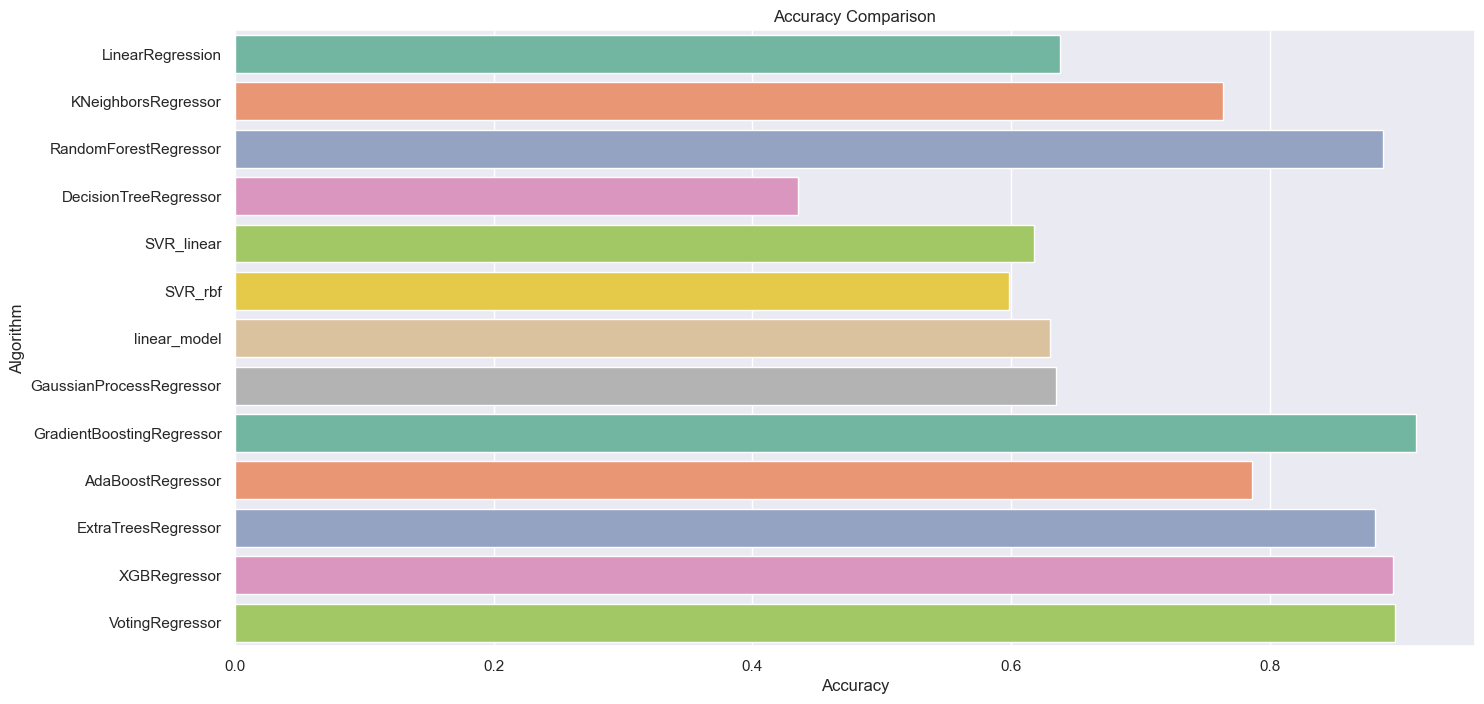

In [101]:
plt.figure(figsize=(16,8))
sns.set()
plt.title('Accuracy Comparison')
sns.barplot(y="Algorithm",x='Accuracy',data=acc_df1,palette='Set2')
sns.set(rc={'figure.figsize':(15,5)})

# NB: Voting Regressor is the best Algorithm for this Dataset.